In [21]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt


## Stick Figure KNeighborsRegression Model + Distance Transform

# 이미지 데이터(특징값) 불러오는 함수 -> 전처리 동시에

def load_images(image_path):
    images = []
    for filename in os.listdir(image_path):
        img = cv2.imread(os.path.join(image_path,filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            _, binary_image = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
            binary_image = binary_image.astype(np.uint8)  # 이미지 형식 변환
            distance_transform = cv2.distanceTransform(binary_image, cv2.DIST_L2, 3)
            img = cv2.resize(distance_transform, (32, 32)) # 이미지 크기 조정
            img = img.flatten() # 이미지 일차원 배열로 변환
            images.append(img)
            
    return np.array(images)




# CSV(목푯값) 불러오는 함수 -> 첫 번째 열(이미지 이름) 제외
def load_csv(csv_path):
    df = pd.read_csv(csv_path, header=None)
    joint = df.iloc[:, 1:].to_numpy()
    return joint



# 데이터셋 경로 지정
X_train = load_images("./image_train/")
y_train = load_csv("./joint_train.csv")

X_test = load_images("./image_test/")
y_test = load_csv("./joint_test.csv")

X_ex = load_images("./image_ex/")
y_ex = load_csv("./joint_ex.csv")



# 확인
print("train data check :", X_train.shape, end = ' / ')
print(y_train.shape)

print("test data check :", X_test.shape, end = ' / ')
print(y_test.shape)

print("ex data check :", X_ex.shape, end = ' / ')
print(y_ex.shape)



# KNN 모델 학습
k = 5

model = KNeighborsRegressor(n_neighbors=k)

model.fit(X_train, y_train)

def accuary(y_test, y_pred):
    T = y_test.reshape(-1,2)
    P = y_pred.reshape(-1,2)
    return 1/(1+np.linalg.norm(T - P, axis=1).mean())

# 모델 정확도 계산
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred, force_finite=True)
print("R² score : {:.2f}".format(r2))

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print("acc : ", accuary(y_test, y_pred))

# 모델 예측
y_pred = model.predict(X_test)

# R-Squared 계산
def r_squared(y_test, y_pred):
    # 실제값의 평균 계산
    mean_y_true = np.mean(y_test)

    # SSE (Sum of Squared Errors) 계산
    sse = np.sum((y_test - y_pred) ** 2)

    # SST (Sum of Squares Total) 계산
    sst = np.sum((y_test - mean_y_true) ** 2)

    # R-제곱 계산
    r_squared = 1 - (sse / sst)

    return r_squared

print('R-Squared:', r_squared(y_test, y_pred))

# 새로운 이미지 데이터로 예측값 구해보기
predict = model.predict(X_ex)
print("image_ex 예측 관절 좌표 :", predict)

print("image_ex 실제 관절 좌표 :", y_ex)

print("오차 :", predict-y_ex)

#-------------------------------------------------------------------------------
# R²(결정계수) 1에 가까울수록 좋음
# R² 너무 낮음
# 훈련 셋보다 테스트 셋의 점수가 높거나 두 점수가 모두 너무 낮은 경우는 모델이 훈련 셋에 '과소적합(Underfitting)'
# 훈련 셋의 점수보다 테스트 셋의 점수가 지나치게 낮은 경우 모델이 훈련 셋에 '과대적합(Overfitting)'
# 둘 다 너무 낮음
# 데이터 양이 너무 적어서 그런듯.. train, test 데이터 더 많이하면 정확도 높아질 수도..

# 추가 구현 해 보고 싶은 것 
## 예측 관절 좌표와 실제 관절 좌표 이미지에 점 찍어보기
## K값 여러 개 한번에 보여주기


train data check : (4000, 1024) / (4000, 22)
test data check : (4000, 1024) / (4000, 22)
ex data check : (1, 1024) / (1, 22)
R² score : 0.35
0.8859537279115358
0.35461480278758245
acc :  0.06847066116206527
R-Squared: 0.9279978023665236
image_ex 예측 관절 좌표 : [[167.4 183.6 169.4 107.  175.6  79.6 232.  121.2 263.4 105.2  92.4 121.4
   56.  120.2 181.2 238.6 180.4 265.8 167.2 239.8 161.  265.4]]
image_ex 실제 관절 좌표 : [[176 134 108 109 102  77 151 102 146  99 117 136 124 120 226 102 249 131
  191 210 204 274]]
오차 : [[ -8.6  49.6  61.4  -2.   73.6   2.6  81.   19.2 117.4   6.2 -24.6 -14.6
  -68.    0.2 -44.8 136.6 -68.6 134.8 -23.8  29.8 -43.   -8.6]]


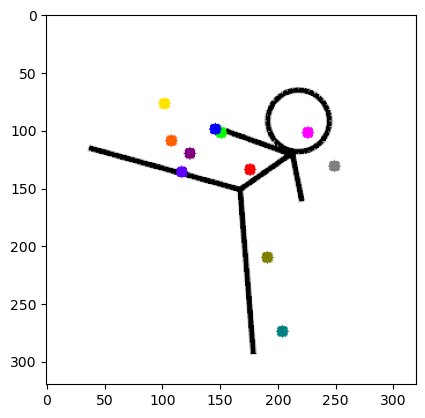

In [22]:
imageFile = './image_ex/sf022135.png'
X_ex_image = cv2.imread(imageFile)

# 각 관절 위치 값 저장
data=y_ex[0]

c1_x = int(round(data[0]))           
c1_y = int(round(data[1]))            
c2_x = int(round(data[2]))             
c2_y = int(round(data[3]))             
c3_x = int(round(data[4]))             
c3_y = int(round(data[5]))             
le_x = int(round(data[6]))             
le_y = int(round(data[7]))            
lh_x = int(round(data[8]))             
lh_y = int(round(data[9]))             
re_x = int(round(data[10]))             
re_y = int(round(data[11]))             
rh_x = int(round(data[12]))             
rh_y = int(round(data[13]))             
lk_x = int(round(data[14]))             
lk_y = int(round(data[15]))              
lf_x = int(round(data[16]))             
lf_y = int(round(data[17]))             
rk_x = int(round(data[18]))             
rk_y = int(round(data[19]))             
rf_x = int(round(data[20]))             
rf_y = int(round(data[21]))  



cv2.circle(X_ex_image,(c1_x,c1_y), radius=5, color=(0,0,255), thickness=-1)  #빨
cv2.circle(X_ex_image,(c2_x,c2_y), radius=5, color=(0,94,255), thickness=-1)  #주
cv2.circle(X_ex_image,(c3_x,c3_y), radius=5, color=(0,228,255), thickness=-1) #노
cv2.circle(X_ex_image,(le_x,le_y), radius=5, color=(0,255,0), thickness=-1)  #초
cv2.circle(X_ex_image,(lh_x,lh_y), radius=5, color=(255,0,0), thickness=-1)  #파
cv2.circle(X_ex_image,(re_x,re_y), radius=5, color=(255,0,95), thickness=-1)
cv2.circle(X_ex_image,(rh_x,rh_y), radius=5, color=(128,0,128), thickness=-1)
cv2.circle(X_ex_image,(lk_x,lk_y), radius=5, color=(255,0,255), thickness=-1)
cv2.circle(X_ex_image,(lf_x,lf_y), radius=5, color=(128,128,128), thickness=-1)
cv2.circle(X_ex_image,(rk_x,rk_y), radius=5, color=(0,128,128), thickness=-1)
cv2.circle(X_ex_image,(rf_x,rf_y), radius=5, color=(128,128,0), thickness=-1)


img = cv2.cvtColor(X_ex_image, cv2.COLOR_BGR2RGB)

#이미지, 점 출력
plt.imshow(img)
plt.show()



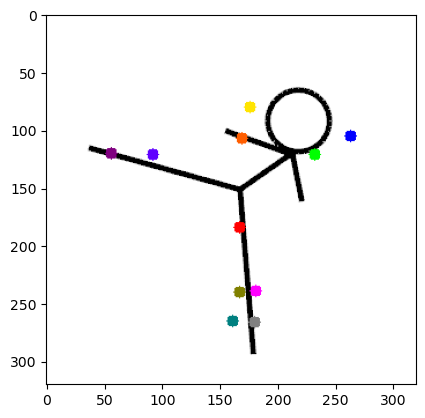

In [23]:
imageFile = './image_ex/sf022135.png'
X_ex_image = cv2.imread(imageFile)

#print(X_ex_image)
#이미지, 점 출력
#plt.imshow(X_ex_image)
#plt.show()

#predictions
#y_ex

# 각 관절 위치 값 저장
data=predict[0]

c1_x = int(round(data[0]))           
c1_y = int(round(data[1]))            
c2_x = int(round(data[2]))             
c2_y = int(round(data[3]))             
c3_x = int(round(data[4]))             
c3_y = int(round(data[5]))             
le_x = int(round(data[6]))             
le_y = int(round(data[7]))            
lh_x = int(round(data[8]))             
lh_y = int(round(data[9]))             
re_x = int(round(data[10]))             
re_y = int(round(data[11]))             
rh_x = int(round(data[12]))             
rh_y = int(round(data[13]))             
lk_x = int(round(data[14]))             
lk_y = int(round(data[15]))              
lf_x = int(round(data[16]))             
lf_y = int(round(data[17]))             
rk_x = int(round(data[18]))             
rk_y = int(round(data[19]))             
rf_x = int(round(data[20]))             
rf_y = int(round(data[21]))  



cv2.circle(X_ex_image,(c1_x,c1_y), radius=5, color=(0,0,255), thickness=-1)  #빨
cv2.circle(X_ex_image,(c2_x,c2_y), radius=5, color=(0,94,255), thickness=-1)  #주
cv2.circle(X_ex_image,(c3_x,c3_y), radius=5, color=(0,228,255), thickness=-1) #노
cv2.circle(X_ex_image,(le_x,le_y), radius=5, color=(0,255,0), thickness=-1)  #초
cv2.circle(X_ex_image,(lh_x,lh_y), radius=5, color=(255,0,0), thickness=-1)  #파
cv2.circle(X_ex_image,(re_x,re_y), radius=5, color=(255,0,95), thickness=-1)
cv2.circle(X_ex_image,(rh_x,rh_y), radius=5, color=(128,0,128), thickness=-1)
cv2.circle(X_ex_image,(lk_x,lk_y), radius=5, color=(255,0,255), thickness=-1)
cv2.circle(X_ex_image,(lf_x,lf_y), radius=5, color=(128,128,128), thickness=-1)
cv2.circle(X_ex_image,(rk_x,rk_y), radius=5, color=(0,128,128), thickness=-1)
cv2.circle(X_ex_image,(rf_x,rf_y), radius=5, color=(128,128,0), thickness=-1)


img = cv2.cvtColor(X_ex_image, cv2.COLOR_BGR2RGB)

#이미지, 점 출력
plt.imshow(img)
plt.show()

